In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Métodos implementados

In [ ]:
def trapeze_rule(f, a, b):
  return (b - a)/2 * (f(a) + f(b))

def repeated_trapeze_rule(fx, x):
  h = x[1] - x[0]
  return h/2 * (fx[0] + fx[-1] + 2*fx[1:-1].sum())

def trapeze_rule_by_samples(y, x):
  result = 0
  for i in range(len(y)-1):
    result += (x[i+1] - x[i])/2 * (y[i] + y[i+1])
  return result

In [ ]:
def simpson_13(f, a, b):
  '''
  Aproxima f(x) por um polinômio interpolador de grau 2
  '''
  h = (b-a) / 2
  x1 = a + h
  result = (h/3) * (f(a) + 4 * f(x1) + f(b))
  return result

def repeated_simpson_13(fx, x):
  h = x[1] - x[0]
  return h/3 * (fx[0] + fx[-1] + 4*fx[1:-1:2].sum() + 2*fx[2:-1:2].sum())

def simpson_one_third_by_samples(y, x):
  result = 0
  X = np.c_[x[:-2:2],x[1:-1:2],x[2::2]]
  Y = np.c_[y[:-2:2],y[1:-1:2],y[2::2]]
  for xi, yi in zip(X, Y):
    h = (xi[2]-xi[0])/2
    result += h/3 * (yi[0] + 4*yi[1] + yi[2])
  return result

In [ ]:
def simpson_38(f, a, b):
  '''
  Aproxima f(x) por um polinômio interpolador de grau 3
  '''
  h = (b-a) / 3
  x1, x2 = a + h, a + 2*h
  result = (3 * h / 8) * (f(a) + 3*f(x1) + 3*f(x2) + f(b))
  return result

def repeated_simpson_38(fx, x):
  h = x[1] - x[0]
  return 3*h/8 * (fx[0] + fx[-1] + 3*fx[1:-1:3].sum() + 3*fx[2:-1:3].sum() + 2*fx[3:-1:3].sum())

def simpson_three_eighths_by_samples(y, x):
  result = 0
  X = np.c_[x[:-3:3],x[1:-2:3],x[2:-1:3], x[3::3]]
  Y = np.c_[y[:-3:3],y[1:-2:3],y[2:-1:3], y[3::3]]
  for xi, yi in zip(X, Y):
    h = (xi[3]-xi[0])/3
    result += 3*h/8 * (yi[0] + 3*yi[1] + 3*yi[2] + yi[3])
  return result

In [ ]:
def improper_integration(f, a, b, g):
  f_t = lambda t: 1/t**2 * f(1/t)
  return g(f_t, 1/b, 1/a)

In [ ]:
def double_integral(x, y, fxy, integrate_x, integrate_y):
  dx_integral = []
  for i,fxy_value in enumerate(fxy):
    dx_integral.append(integrate_x(fxy_value, x))

  dx_integral = np.array(dx_integral)

  return integrate_y(dx_integral, y)

In [ ]:
def gaussquad_2pt(f, a, b):
  '''
  Fórmula para 2 pontos
  '''
  t0, t1 = -np.sqrt(3)/3, np.sqrt(3)/3
  x = lambda t: (b-a)/2 * t + (a+b)/2
  x0, x1 = x(t0), x(t1)
  return (b - a)/2 * (f(x0) + f(x1))

def gaussquad_3pt(f, a, b):
  '''
  Fórmula para 3 pontos
  '''
  t0, t1, t2 = -np.sqrt(3/5), 0, np.sqrt(3/5)
  x = lambda t: (b-a)/2 * t + (a+b)/2
  x0, x1, x2 = x(t0), x(t1), x(t2)
  w0, w1, w2 = 5/9, 8/9, 5/9
  return (b - a)/2 * (w0*f(x0) + w1*f(x1) + w2*f(x2))

# 1 – Calcule numericamente as seguintes integrais, utilizando os métodos simples e aplicações múltiplas de Trapézio e Simpson

In [ ]:
a, b = 0, 1

## a) $\int_0^1 e^{-x}\ dx $

In [ ]:
f = lambda x: np.exp(-x)

print('Aplicacoes simples:')
print(f'Trapezio: {trapeze_rule(f, a, b):.4f}')
print(f'1/3 de Simpson: {simpson_13(f, a, b):.4f}')
print(f'3/8 de Simpson: {simpson_38(f, a, b):.4f}')

# aplicacoes multiplas
n = 4 # numero de subintervalos
x = np.linspace(a, b, n+1)
fx = f(x)
print('-'*30)
print('Aplicacoes multiplas:')
print(f'Trapezio multipla: {repeated_trapeze_rule(fx, x):.4f}')
print(f'1/3 de Simpson multipla: {repeated_simpson_13(fx, x):.4f}')
print(f'3/8 de Simpson multipla: {repeated_simpson_38(fx, x):.4f}')

Aplicacoes simples:
Trapezio: 0.6839
1/3 de Simpson: 0.6323
3/8 de Simpson: 0.6322
------------------------------
Aplicacoes multiplas:
Trapezio multipla: 0.6354
1/3 de Simpson multipla: 0.6321
3/8 de Simpson multipla: 0.6064


## b) $\int_0^1 x^2\ dx$

In [ ]:
f = lambda x: x**2

print('Aplicacoes simples:')
print(f'Trapezio: {trapeze_rule(f, a, b):.4f}')
print(f'1/3 de Simpson: {simpson_13(f, a, b):.4f}')
print(f'3/8 de Simpson: {simpson_38(f, a, b):.4f}')

# aplicacoes multiplas
n = 4 # numero de subintervalos
x = np.linspace(a, b, n+1)
fx = f(x)
print('-'*30)
print('Aplicacoes multiplas:')
print(f'Trapezio multipla: {repeated_trapeze_rule(fx, x):.4f}')
print(f'1/3 de Simpson multipla: {repeated_simpson_13(fx, x):.4f}')
print(f'3/8 de Simpson multipla: {repeated_simpson_38(fx, x):.4f}')

Aplicacoes simples:
Trapezio: 0.5000
1/3 de Simpson: 0.3333
3/8 de Simpson: 0.3333
------------------------------
Aplicacoes multiplas:
Trapezio multipla: 0.3438
1/3 de Simpson multipla: 0.3333
3/8 de Simpson multipla: 0.2871


## c) $\int_0^1 x^3\ dx$

In [ ]:
f = lambda x: x**3

print('Aplicacoes simples:')
print(f'Trapezio: {trapeze_rule(f, a, b):.4f}')
print(f'1/3 de Simpson: {simpson_13(f, a, b):.4f}')
print(f'3/8 de Simpson: {simpson_38(f, a, b):.4f}')

# aplicacoes multiplas
n = 4 # numero de subintervalos
x = np.linspace(a, b, n+1)
fx = f(x)
print('-'*30)
print('Aplicacoes multiplas:')
print(f'Trapezio multipla: {repeated_trapeze_rule(fx, x):.4f}')
print(f'1/3 de Simpson multipla: {repeated_simpson_13(fx, x):.4f}')
print(f'3/8 de Simpson multipla: {repeated_simpson_38(fx, x):.4f}')

Aplicacoes simples:
Trapezio: 0.5000
1/3 de Simpson: 0.2500
3/8 de Simpson: 0.2500
------------------------------
Aplicacoes multiplas:
Trapezio multipla: 0.2656
1/3 de Simpson multipla: 0.2500
3/8 de Simpson multipla: 0.2124


## d) $\int_0^1 x e^{-x^2}\ dx$

In [ ]:
f = lambda x: x * np.exp(-x**2)

print('Aplicacoes simples:')
print(f'Trapezio: {trapeze_rule(f, a, b):.4f}')
print(f'1/3 de Simpson: {simpson_13(f, a, b):.4f}')
print(f'3/8 de Simpson: {simpson_38(f, a, b):.4f}')

# aplicacoes multiplas
n = 4 # numero de subintervalos
x = np.linspace(a, b, n+1)
fx = f(x)
print('-'*30)
print('Aplicacoes multiplas:')
print(f'Trapezio multipla: {repeated_trapeze_rule(fx, x):.4f}')
print(f'1/3 de Simpson multipla: {repeated_simpson_13(fx, x):.4f}')
print(f'3/8 de Simpson multipla: {repeated_simpson_38(fx, x):.4f}')

Aplicacoes simples:
Trapezio: 0.1839
1/3 de Simpson: 0.3209
3/8 de Simpson: 0.3181
------------------------------
Aplicacoes multiplas:
Trapezio multipla: 0.3089
1/3 de Simpson multipla: 0.3163
3/8 de Simpson multipla: 0.2902


## e) $\int_0^1 \frac{1}{x^2+1}\ dx$

In [ ]:
f = lambda x: 1 / (x**2 + 1)

print('Aplicacoes simples:')
print(f'Trapezio: {trapeze_rule(f, a, b):.4f}')
print(f'1/3 de Simpson: {simpson_13(f, a, b):.4f}')
print(f'3/8 de Simpson: {simpson_38(f, a, b):.4f}')

# aplicacoes multiplas
n = 4 # numero de subintervalos
x = np.linspace(a, b, n+1)
fx = f(x)
print('-'*30)
print('Aplicacoes multiplas:')
print(f'Trapezio multipla: {repeated_trapeze_rule(fx, x):.4f}')
print(f'1/3 de Simpson multipla: {repeated_simpson_13(fx, x):.4f}')
print(f'3/8 de Simpson multipla: {repeated_simpson_38(fx, x):.4f}')

Aplicacoes simples:
Trapezio: 0.7500
1/3 de Simpson: 0.7833
3/8 de Simpson: 0.7846
------------------------------
Aplicacoes multiplas:
Trapezio multipla: 0.7828
1/3 de Simpson multipla: 0.7854
3/8 de Simpson multipla: 0.7503


## f) $\int_0^1 \frac{x}{x^2+1}\ dx$

In [ ]:
f = lambda x: x / (x**2 + 1)

print('Aplicacoes simples:')
print(f'Trapezio: {trapeze_rule(f, a, b):.4f}')
print(f'1/3 de Simpson: {simpson_13(f, a, b):.4f}')
print(f'3/8 de Simpson: {simpson_38(f, a, b):.4f}')

# aplicacoes multiplas
n = 4 # numero de subintervalos
x = np.linspace(a, b, n+1)
fx = f(x)
print('-'*30)
print('Aplicacoes multiplas:')
print(f'Trapezio multipla: {repeated_trapeze_rule(fx, x):.4f}')
print(f'1/3 de Simpson multipla: {repeated_simpson_13(fx, x):.4f}')
print(f'3/8 de Simpson multipla: {repeated_simpson_38(fx, x):.4f}')

Aplicacoes simples:
Trapezio: 0.2500
1/3 de Simpson: 0.3500
3/8 de Simpson: 0.3481
------------------------------
Aplicacoes multiplas:
Trapezio multipla: 0.3413
1/3 de Simpson multipla: 0.3468
3/8 de Simpson multipla: 0.3156


# 2 – Calcule numericamente a integral $\int_0^2 x^2e^{x^2} \,dx$ pelas regras compostas do Trapézio e Simpson variando o número de intervalos $n = 1, 2, 3, 6, 12, 24, 48, 96$. Estime o erro em cada caso.

In [ ]:
f = lambda x: x**2 * np.exp(x**2)
a, b = 0, 2
n = [1, 2, 3, 6, 12, 24, 48, 96]

for subinterval in n:
  x = np.linspace(a, b, subinterval+1)
  fx = f(x)
  result = repeated_trapeze_rule(fx, x)
  print(f'Regra do trapézio com {subinterval} subintervalos: {result:.3f}')

Regra do trapézio com 1 subintervalos: 218.393
Regra do trapézio com 2 subintervalos: 111.915
Regra do trapézio com 3 subintervalos: 80.272
Regra do trapézio com 6 subintervalos: 55.975
Regra do trapézio com 12 subintervalos: 48.866
Regra do trapézio com 24 subintervalos: 47.002
Regra do trapézio com 48 subintervalos: 46.530
Regra do trapézio com 96 subintervalos: 46.411


In [ ]:
for subinterval in n[2:]:
  x = np.linspace(a, b, subinterval+1)
  fx = f(x)
  result = repeated_simpson_38(fx, x)
  print(f'3/8 de Simpson com {subinterval} subintervalos: {result:.3f}')

3/8 de Simpson com 3 subintervalos: 63.007
3/8 de Simpson com 6 subintervalos: 48.983
3/8 de Simpson com 12 subintervalos: 46.625
3/8 de Simpson com 24 subintervalos: 46.390
3/8 de Simpson com 48 subintervalos: 46.373
3/8 de Simpson com 96 subintervalos: 46.372


# 3 – Estamos interessados em avaliar numericamente a integral $\int_0^1 ln(x)sen(x) \,dx$ cujo valor com 10 casas decimais corretas é -0,2398117420. Aproxime esta integral via Quadratura Gaussiana com $n = 2, 3, 4, 5, 6, 7$

In [ ]:
f = lambda x: np.log(x)*np.sin(x)
a, b = 0, 1

result_2pt = gaussquad_2pt(f, a, b)
result_3pt = gaussquad_3pt(f, a, b)

print(f'Resultado da integral via quadratura gaussiana (c/ 2 pontos): {result_2pt}')
print(f'Resultado da integral via quadratura gaussiana (c/ 3 pontos): {result_3pt}')

Resultado da integral via quadratura gaussiana (c/ 2 pontos): -0.2472260731334629
Resultado da integral via quadratura gaussiana (c/ 3 pontos): -0.2416450940919996


# 4 - A massa total de uma haste de densidade de densidade variável é dada por

$ m = \int_0^L \rho (x).A_c(x) \,dx $,

## em que m é a massa, $\rho(x)$ é a densidade, $A_c(x)$ é a área da seção transversal, x é a distância ao longo da haste, e L é o comprimento total da haste. Os seguintes dados foram medidos para uma haste de 10 m. Determine a massa em quilogramas com a melhor precisão possível.

$$
\begin{array}{|c|c|}
\hline
\text{x,m} & 0 & 2 & 3 & 4 & 6 & 8 & 10\\
\hline
\rho,\frac{g}{cm^3} & 4,00 & 3,95 & 3,89 & 3,80 & 3,60 & 3,41 & 3,30\\
\hline
A_c, cm^2 & 100 & 103 & 106 & 110 & 120 & 133 & 150\\
\hline
\end{array}
$$

In [ ]:
x = np.array([0, 2, 3, 4, 6, 8, 10])
rho = np.array([4, 3.95, 3.89, 3.80, 3.60, 3.41, 3.30])
Ac = np.array([100, 103, 106, 110, 120, 133, 150])
y = rho * Ac

In [ ]:
def find_intervals(arr):
  result = []
  current_diff = arr[1] - arr[0]
  current_indices = [0, 1]

  for i in range(2, len(arr)):
    diff = arr[i] - arr[i-1]
    if diff == current_diff:
      current_indices.append(i)
    else:
      result.append(current_indices)
      current_indices = [i-1, i]
      current_diff = diff

  result.append(current_indices)
  return result

In [ ]:
result = 0
intervals = find_intervals(x)
for interval in intervals:
  if len(interval) == 2:
    result += trapeze_rule_by_samples(y[interval],x[interval])
  if len(interval) == 3:
    result += simpson_one_third_by_samples(y[interval], x[interval])
  elif len(interval) == 4:
    result += simpson_three_eighths_by_samples(y[interval], x[interval])

print(f'Intervals: {intervals}')
print(f'Resultado da integral: {result:.3f}')

Intervals: [[0, 1], [1, 2, 3], [3, 4, 5, 6]]
Resultado da integral: 4308.779


# 5 – Determine o valor médio para os dados na figura abaixo. Faça a integral necessária para a média na ordem mostrada na equação:

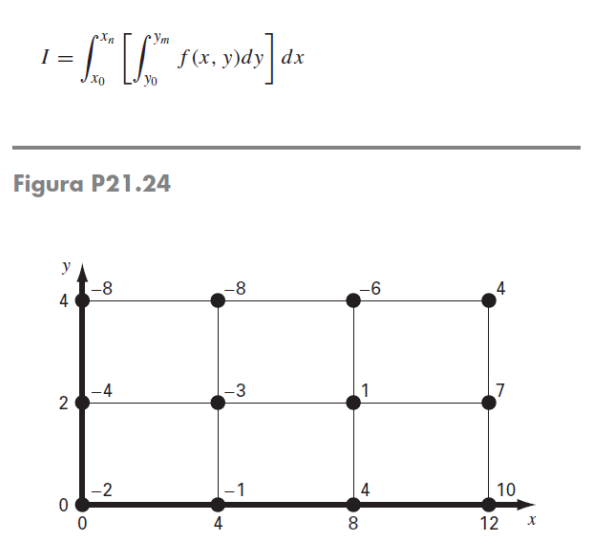

In [ ]:
x = np.linspace(0,12,4)
y = np.linspace(0,4,3)
z = np.array([
    [-8,-8,-6,4],
    [-4,-3,1,7],
    [-2,-1,4,10]
])

result = double_integral(x, y, z, simpson_three_eighths_by_samples, simpson_one_third_by_samples)
result / ((x[-1] - x[0]) * (y[-1] - y[0]))

-0.8541666666666666

# 6 – Use integração numérica para calcular:

## a) $\int_{0}^{\infty} e^{-y} sen^2y\ dy$


In [ ]:
def improper_integration(f, a, b, g):
  f_t = lambda t: 1/(t**2) * f(1/t)
  return g(f_t, 1/b, 1/a)

In [ ]:
f = lambda y: np.exp(-y) * np.sin(y)**2
f_t = lambda t: 1/(t**2) * f(1/t)
a, b, c = 0, 4, 1e20
integral = simpson_38(f, a, b) + improper_integration(f, b, c, simpson_38)
integral

0.40647641601307005

## b) $\int_0^\infty \frac{1}{2\pi} e^{-x^2}\ dx$

In [ ]:
f = lambda x: 1/np.sqrt(2*np.pi) * np.exp(-(x**2))
f_t = lambda t: 1/(t**2) * f(1/t)
a, b, c = 0, 1, 1e20
integral = simpson_38(f, a, b) + improper_integration(f, b, c, simpson_38)
integral

0.3519964896678724